In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from time import time

# Лабораторная работа 2

**Внимание!** За эту работу можно получить не более 10 баллов. Так что вы можете выбрать, какие из заданий вам более интересны, и делать их. Оценка будет равна минимуму из 10 и полученного вами числа баллов.

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ --- столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ --- столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением --- то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N - количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором - тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом - $n$ точек (значения аргумента $x$), во втором - значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача - по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [2]:
data_train = np.loadtxt('./train.txt', delimiter=',')
data_test = np.loadtxt('./test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [3]:
X_train = data_train[:,0]
Y_train = data_train[:,1]

# Сделайте то же для тестовой выборки
X_test = data_test[:,0]
Y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

Наше матричное уравнение для общего случая $f(x) = \alpha_0 + \alpha_1 \cdot x + \alpha_2 \cdot x^2 + ... + \alpha_k \cdot x^k$, будет выглядеть следующим образом ($n$ - кол-во точек в выборке):  

$$ \begin{pmatrix}
1 & x_1 & x_1^2 & ... & x_1^k \\
1 & x_2 & x_2^2 & ... & x_2^k \\
...&...&...&...&... \\
...&...&...&...&... \\
1 & x_n & x_n^2 & ... & x_n^k \\ 
\end{pmatrix} \cdot 
\begin{pmatrix}
\alpha_0 \\
\alpha_1 \\
...\\
...\\
\alpha_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\
y_2 \\
...\\
...\\
y_n
\end{pmatrix}
$$

In [4]:
def find_f_degof_k(Xpt, Ypt, k):
    n = len(Xpt)
    X = np.array([np.ones(n)]).transpose()
    y = np.array([Ypt]).transpose()
    for i in range(1, k + 1):
        X = np.concatenate((X, (np.array([Xpt]) ** i).transpose()), axis=1)
    a = np.dot(np.dot(scipy.linalg.inv(np.dot(X.T.copy(), X.copy())), X.T.copy()), y)
    return np.array([x[0] for x in a])
b_1, k_1 = find_f_degof_k(X_train, Y_train, 1)
print('y =', k_1, '* x +', b_1)

y = 2.2791344980519463 * x + 4.433230905064935


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

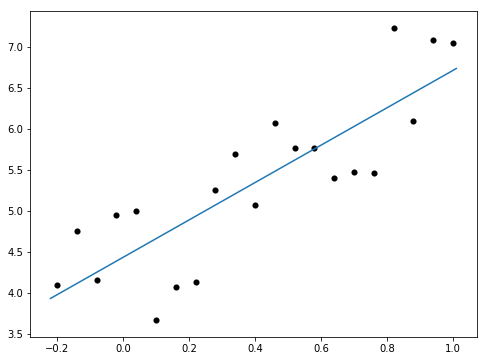

In [5]:
dx = np.float64(0.01)
x_min = min(X_train) - 2 * dx
x_max = max(X_train) + 2 * dx
xplot = np.arange(x_min, x_max, dx)
yplot = [k_1 * x + b_1 for x in xplot]

plt.figure(figsize=(8,6))
plt.plot(xplot, yplot)
plt.scatter(X_train, Y_train, c='black', linewidths=0.1)

Многочлен 21-ой степени будет лучше всего приближать нашу функцию

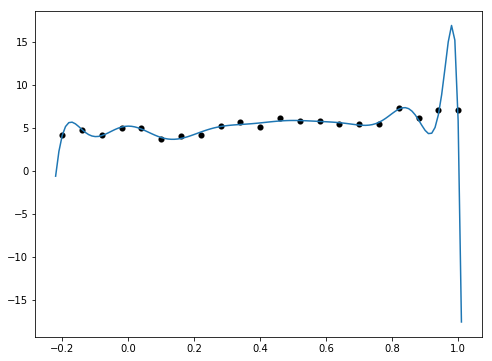

In [6]:
def f_at_point(coeffs, X):
    res = np.float64('0')
    for i in range(len(coeffs)):
        res += coeffs[i] * (X ** i)
    return res
coeffs_21 = find_f_degof_k(X_train, Y_train, 21)
yplot = [f_at_point(coeffs_21, x) for x in xplot]

plt.figure(figsize=(8,6))
plt.plot(xplot, yplot)
plt.scatter(X_train, Y_train, c='black', linewidths=0.1)

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

Coefficients of f(x) for k=1,2,3,4,6:
for k = 1: 4.433230905064935, 2.2791344980519463
for k = 2: 4.472476503404163, 1.1578316883597317, 1.4016285121152618
for k = 3: 4.460736355285092, 1.0650161052852072, 1.859750837260897, -0.38176860428793447
for k = 4: 4.341166120399732, 1.1718023926317862, 6.794091784356436, -13.051328119989805, 7.918474697313577
for k = 6: 4.383795011025418, -4.597179325740246, 16.002903991760604, 121.2570971436632, -481.51013294070026, 581.4532983117765, -229.9701334464155


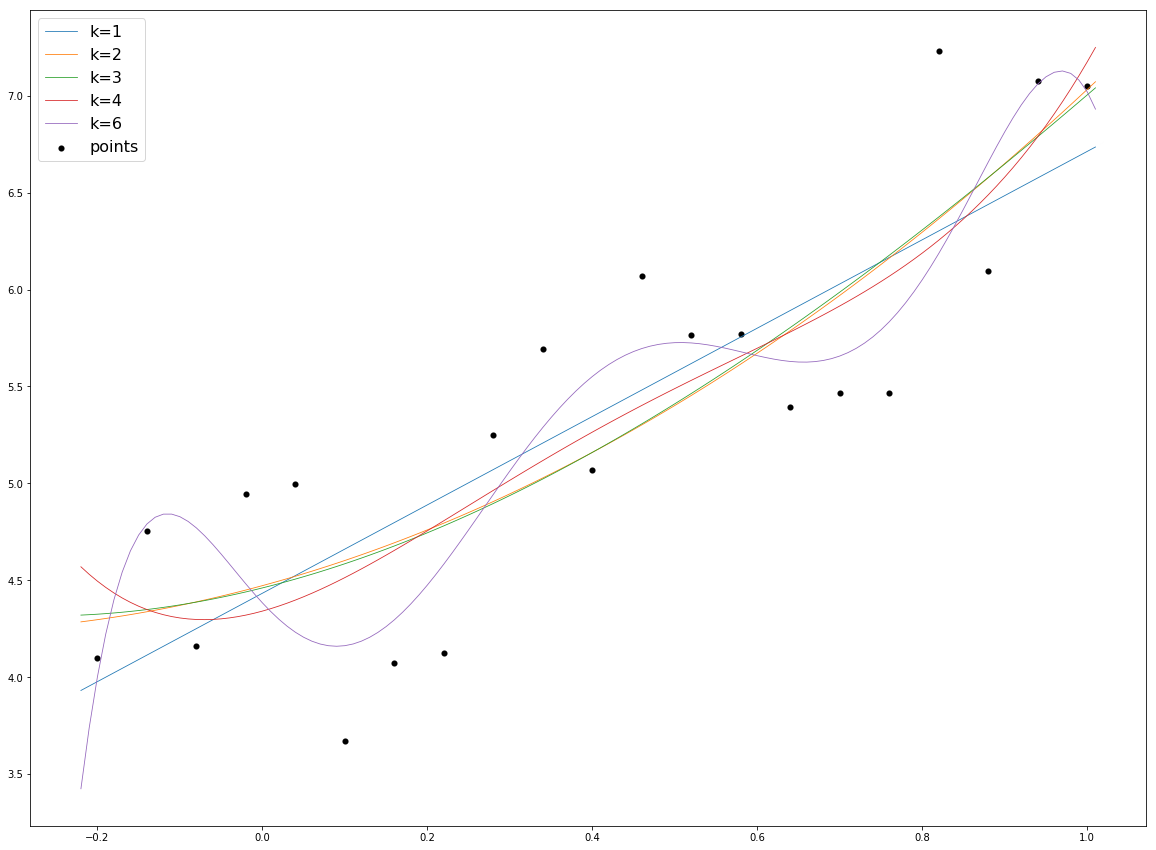

In [7]:
def average_quadradic_error(coeffs, toprint):
    res_train = np.float64('0')
    res_test = np.float64('0')
    n = len(X_train)
    for i in range(n):
        diff = f_at_point(coeffs, X_train[i]) - Y_train[i]
        res_train += diff * diff
        diff = f_at_point(coeffs, X_test[i]) - Y_test[i]
        res_test += diff * diff
    res_train /= np.float64(n)
    res_test /= np.float64(n)
    if toprint:
        print('for k =', len(coeffs) - 1, 'in train =', res_train, ', in test =', res_test)
    return res_test
degree = [1, 2, 3, 4, 6]
print('Coefficients of f(x) for k=1,2,3,4,6:')
for k in degree:
    print('for k =', k, end=': ')
    print(*find_f_degof_k(X_train, Y_train, k), sep=', ')
plt.figure(figsize=(20,15))
for k in degree:
    cur_coeffs = find_f_degof_k(X_train, Y_train, k)
    yplot = [f_at_point(cur_coeffs, x) for x in xplot]
    plt.plot(xplot, yplot, linewidth=0.8, label='k=%d' % k)
plt.scatter(X_train, Y_train, c='black', linewidths=0.1, label='points')
plt.legend(prop={'size': 16})

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

Average-quadradic error:
for k = 1 in train = 0.29689663326251964 , in test = 0.4351202004048878
for k = 2 in train = 0.2696989158766915 , in test = 0.3564762887831216
for k = 3 in train = 0.2694971871479612 , in test = 0.3553464571518429
for k = 4 in train = 0.2610665330579276 , in test = 0.4417270189279321
for k = 5 in train = 0.24998504648317546 , in test = 0.5579732021639883
for k = 6 in train = 0.1882934898837057 , in test = 2.5816929336698746
for k = 7 in train = 0.1853962115329445 , in test = 2.515782887373347
for k = 8 in train = 0.15905556579090008 , in test = 4.357288390875935
for k = 9 in train = 0.15847184275045734 , in test = 4.776329652351361
for k = 10 in train = 0.15316610996166982 , in test = 14.632125351476915
for k = 21 in train = 0.1307616168129864 , in test = 1194996.3171057985


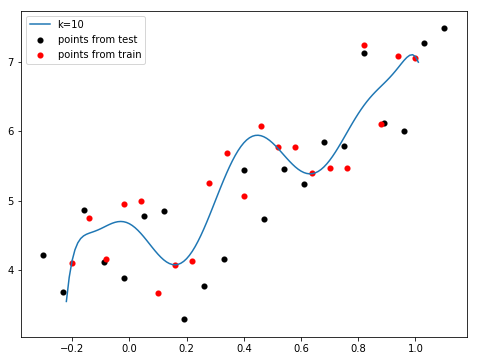

In [8]:
print('Average-quadradic error:')
for k in range(1, 11):
    average_quadradic_error(find_f_degof_k(X_train, Y_train, k), True)
average_quadradic_error(find_f_degof_k(X_train, Y_train, 21), True)
coeffs_10 = find_f_degof_k(X_train, Y_train, 10)
yplot = [f_at_point(coeffs_10, x) for x in xplot]
plt.figure(figsize=(8,6))
plt.plot(xplot, yplot, label='k=10')
plt.scatter(X_test, Y_test, label='points from test', c='black', linewidths=0.1)
plt.scatter(X_train, Y_train, label='points from train', c='red', linewidths=0.1)
plt.legend()

Очевидно, что, чем больше степень многочлена, то тем лучше она будет приближать обучающую выборку, но с увеличением степени будет появляться эффект переобучения, вследсвие чего и такая большая ошибка на тестовых данных.

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

Пусть цена квартиры $p$ имеет следующую зависимость:
$$ y = a_1 \cdot x_1 + a_2 \cdot x_2 + a_3 \cdot x_3 + a_4 \cdot x_4 + a_5 \cdot x_5 + a_6 $$  
, где $x_i$ - регрессоры, а $a_i$ - их коэффициенты

In [9]:
data = np.loadtxt('./flats_moscow_mod.txt', delimiter='\t', skiprows=1)
print('У нас имеется %d регрессеров и %d измерений для них' % (5, len(data)))
def find_linear_regression(Data):
    n = len(Data)
    k = 5
    X = np.zeros(shape=(n, k))
    y = np.array([z[0] for z in Data]).transpose()
    for i in range(n):
        for j in range(k):
            X[i][j] = Data[i][j + 1]
    X = np.concatenate((X, np.array([np.ones(n)]).transpose()), axis=1)
    a = np.dot(np.dot(scipy.linalg.inv(np.dot(X.T.copy(), X.copy())), X.T.copy()), y)
    return a
A = find_linear_regression(data)
print('Коэффициент общей площади квартиры =', A[0])
print('Коэффициент жилой площади квартиры =', A[1])
print('Коэффициент площади кухни =', A[2])
print('Коэффициент расстояния от центра =', A[3])
print('Коэффициент расстояния до метро =', A[4])
print('Свободный коэффициент =', A[5])

У нас имеется 5 регрессеров и 2040 измерений для них
Коэффициент общей площади квартиры = 1.4870528861257941
Коэффициент жилой площади квартиры = 1.6562890012269917
Коэффициент площади кухни = 1.8192049792747063
Коэффициент расстояния от центра = -3.3271540562741033
Коэффициент расстояния до метро = -1.315688603701586
Свободный коэффициент = -26.789269634185445


Как видно из значений сверху, только два коэффициента отрицательны - расстояние от центра и расстояние до метро. Такое явление логично, так как тем дальше распологается квартира от центра или метро, то логично, что тем меньше будет его стоимость. Думаю такие коэффициенты согласуются с моими представлениями о жизни, расстояние от центра имеет большую ценность, площадь тоже, хотя для меня площадь кухни маловажный фактор. Теперь можно посчитать среднеквадрическую ошибку.

In [10]:
def mean_square_error(Regression, Test):
    error = 0.0
    for i in range(len(Test)):
        cur_diff = 0.0
        for j in range(1, 6):
            cur_diff += Regression[j - 1] * Test[i][j]
        cur_diff += Regression[5]
        cur_diff -= Test[i][0]
        error += cur_diff * cur_diff
    error /= len(Test)
    return error
print('Среднеквадратическая ошибка =', mean_square_error(A, data))

Среднеквадратическая ошибка = 924.0090032083991


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [11]:
Data_train, Data_test = train_test_split(data, test_size=0.5)

In [12]:
powers = [0.8587506960238308, 6.9914731749892622, 0.501602154342981, 0.3139549321633976, 0.3516835655970999]
def find_linear_regression_omodel(Data):
    n = len(Data)
    k = 5
    X = np.zeros(shape=(n, k))
    y = np.array([arr[0] for arr in Data]).transpose()
    for i in range(n):
        for j in range(k):
            X[i][j] = (Data[i][j + 1] ** powers[j])
    X = np.concatenate((X, np.array([np.ones(n)]).transpose()), axis=1)
    a = np.dot(np.dot(scipy.linalg.inv(np.dot(X.T.copy(), X.copy())), X.T.copy()), y)
    return a
def error():
    A_new = find_linear_regression_omodel(Data_train)
    error_train = 0.0
    error_test = 0.0
    for i in range(len(Data_train)):
        diff1 = 0.0
        diff2 = 0.0
        for j in range(5):
            diff1 += A_new[j] * (Data_train[i][j + 1] ** powers[j])
            diff2 += A_new[j] * (Data_test[i][j + 1] ** powers[j])
        diff1 += A_new[5]
        diff2 += A_new[5]
        diff1 -= Data_train[i][0]
        diff2 -= Data_test[i][0]
        error_train += diff1 * diff1
        error_test += diff2 * diff2
    error_train /= float(len(Data_train))
    error_test /= float(len(Data_test))
    lin_error = mean_square_error(find_linear_regression(Data_train), Data_test)
    betterness = (lin_error / error_test - 1.0) * 100.0
    return error_train, error_test, lin_error, betterness
test_count = 10
for i in range(test_count):
    print('Test #%d' % (i + 1))
    Data_train, Data_test = train_test_split(data, test_size=0.5)
    error_train, error_test, lin_error, betterness = error()
    print('New formula error in train =', error_train)
    print('New formula error in test =', error_test)
    print('Linear regression error in test =', lin_error)
    print('Betterness percent =', betterness, '%', end='\n\n')

Test #1
New formula error in train = 950.2785295087971
New formula error in test = 583.9061288171241
Linear regression error in test = 822.9473260907714
Betterness percent = 40.93829221452025 %

Test #2
New formula error in train = 706.7303524728301
New formula error in test = 819.7123185495847
Linear regression error in test = 907.8307704943915
Betterness percent = 10.749924083210715 %

Test #3
New formula error in train = 779.5839200935131
New formula error in test = 746.5118582107808
Linear regression error in test = 953.2603782112716
Betterness percent = 27.6952760664807 %

Test #4
New formula error in train = 765.7786617973909
New formula error in test = 767.3378622067055
Linear regression error in test = 1074.7665608504435
Betterness percent = 40.064320266907785 %

Test #5
New formula error in train = 746.2726679506208
New formula error in test = 813.6245498199781
Linear regression error in test = 1062.0423132505723
Betterness percent = 30.532235474649696 %

Test #6
New formula e

Новая модель представляет из себя следующую зависимость:
$$ y = a_1 \cdot x_1^{\alpha_1} + a_2 \cdot x_2^{\alpha_2} + a_3 \cdot x_3^{\alpha_3} + a_4 \cdot x_4^{\alpha_4} + a_5 \cdot x_5^{\alpha_5} + a_6 $$  

$ \alpha_i $ есть в массиве $powers$

### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы - необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них - регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

ВСЕ ВЫЧИСЛЕНИЯ В ДАННОЙ ЧАСТИ ПРОИЗВЕДЕНЫ ДЛЯ МНОГОЧЛЕНА 6 СТЕПЕНИ


<IPython.core.display.Math object>

4.204910490400694, 1.246060756966501, 0.7410313710021225, 0.41177189831850375, 0.26006281534534004, 0.17692059865582355, 0.12800417678095832
With regularization error for k = 6 in train = 0.33898635814739414 , in test = 0.3074052872072662

Determinant of X^T * X = 9.082864837387536e-12
Determinant of X^T * X + lambda * E = 1198.2448717740565


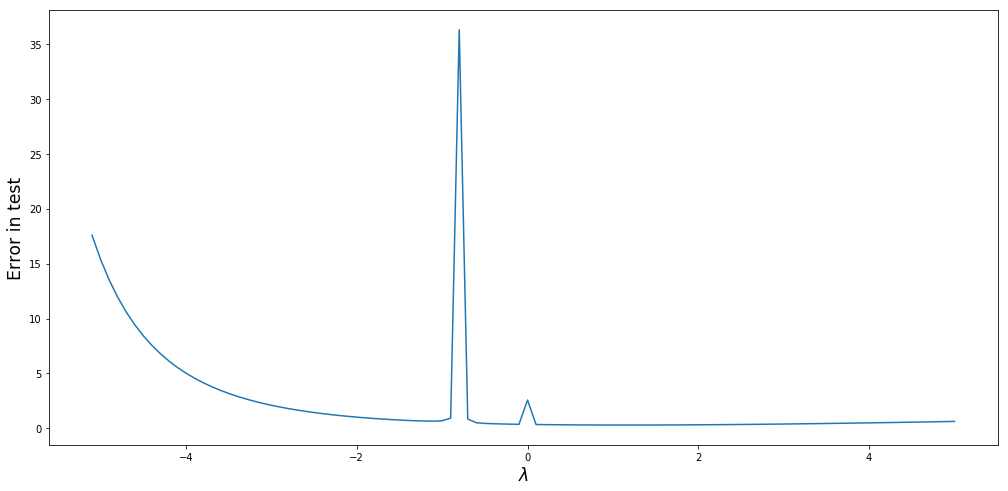

In [13]:
from IPython.display import display, Math, Latex
def find_f_wL2R(Xpt, Ypt, k, lamb):
    n = len(Xpt)
    X = np.array([np.ones(n)]).transpose()
    y = np.array([Ypt]).transpose()
    for i in range(1, k + 1):
        X = np.concatenate((X, (np.array([Xpt]) ** i).transpose()), axis=1)
    a = np.dot(np.dot(scipy.linalg.inv(
                        np.add(np.dot(X.T.copy(), X.copy()), np.dot(lamb, np.eye(k + 1)))   ), 
        X.T.copy()), y)
    return a.transpose().reshape(7), scipy.linalg.det(np.dot(X.T.copy(), X.copy())), scipy.linalg.det(np.add(np.dot(X.T.copy(), X.copy()), np.dot(lamb, np.eye(k + 1))))
print('ВСЕ ВЫЧИСЛЕНИЯ В ДАННОЙ ЧАСТИ ПРОИЗВЕДЕНЫ ДЛЯ МНОГОЧЛЕНА 6 СТЕПЕНИ')


lambda_x = np.arange(-5.1, 5.1, 0.1)
lambda_y = [average_quadradic_error(find_f_wL2R(X_train, Y_train, 6, x)[0], False) for x in lambda_x]
plt.figure(figsize=(17,8))
plt.plot(lambda_x, lambda_y)
plt.ylabel('Error in test', fontsize='xx-large')
plt.xlabel(r'$\lambda$', fontsize='xx-large')


coeff_6_l2, detX, detXL2 = find_f_wL2R(X_train, Y_train, 6, 1.2)
coeff_6 = find_f_degof_k(X_train, Y_train, 6)
display(Math(r'Coefficients \> with \> regularization \> for \> \lambda = 1.2 :'))
print(*coeff_6_l2, sep=', ')
print('With regularization error ', end='')
average_quadradic_error(coeff_6_l2, True)
print('\nDeterminant of X^T * X =', detX)
print('Determinant of X^T * X + lambda * E =', detXL2)

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

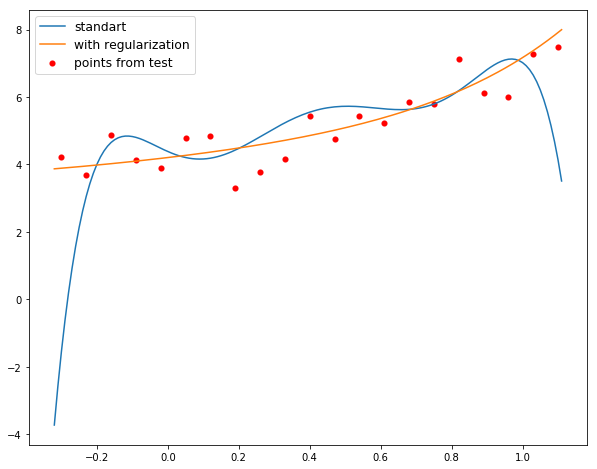

In [14]:
x_min = min(X_test) - 2 * dx
x_max = max(X_test) + 2 * dx
xplot = np.arange(x_min, x_max, dx)
yplot = [f_at_point(coeff_6, x) for x in xplot]

plt.figure(figsize=(10,8))
plt.plot(xplot, yplot, label='standart')

yplot = [f_at_point(coeff_6_l2, x) for x in xplot]
plt.plot(xplot, yplot, label='with regularization')

plt.scatter(X_test, Y_test, c='red', linewidths=0.1, label='points from test')
plt.legend(prop={'size': 12.3})

Во-первыъ, первый вариант лучше тем, что он не "переобучается" и вследствие этого имеет намного меньшую ошибку в тестовой выборке. Во-вторых, коэффициенты с регуляризацией стали намного меньше по модулю, что тоже является большим плюсом.

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**  
Для начала заметим что $|Z|^2 = Z^T \cdot Z$, для некотрого вектора-столбца $Z$. Для того что выполнялось $|Xa - y|^2 + \lambda|a|^2\rightarrow\min$ приравняем её производную относительно $a$ к нулю и решим полученное уравнение. Для начала напишем все в матричном виде.  

$$ F = |Xa - y|^2 + \lambda|a|^2 = |y - Xa|^2 + \lambda|a|^2 = (y - Xa)^T \cdot (y - Xa) + \lambda \cdot a^T \cdot a = y^T \cdot y - 2y^T \cdot X \cdot a + a^T \cdot X^T \cdot X \cdot a + \lambda \cdot a^T \cdot a $$  

$$ \frac{dF}{da} = -2X^T \cdot y + 2X^T \cdot X \cdot a + 2\lambda \cdot a = 0 $$  

$$ 2X^T \cdot X \cdot a + 2\lambda \cdot a = 2X^T \cdot y  \qquad |\cdot \frac{1}{2}$$  

$$ X^T \cdot X \cdot a + \lambda \cdot a = X^T \cdot y$$  

$$ (X^T \cdot X + \lambda \cdot E) \cdot a = X^T \cdot y$$  

$$ a = (X^T \cdot X + \lambda \cdot E)^{-1} \cdot X^T \cdot y $$

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной, и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Обозначим $X_{(t)} = (x_1\ldots x_t)^T$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**


$x_i$ - это векторы-стобцы, допустим, размера $k$. Тогда $x_{i,j}$ - $j$-ый элемент $i$-го вектора-столбца. Теперь, выпишем матрицы $X_{(t)}$ и $X^T_{(t)}$:  

$$ X_{(t)} = 
\begin{pmatrix}
x_{1,1} & x_{1,2} & ... & x_{1,k} \\
x_{2,1} & x_{2,2} & ... & x_{2,k} \\
... & ... & ... & ... \\
x_{t,1} & x_{t,2} & ... & x_{t,k}
\end{pmatrix}
\qquad X^T_{(t)} = 
\begin{pmatrix}
x_{1,1} & x_{2,1} & ... & x_{t,1} \\
x_{1,2} & x_{2,2} & ... & x_{t,2} \\
... & ... & ... & ... \\
x_{1,k} & x_{2,k} & ... & x_{t,k}
\end{pmatrix}
$$  

Теперь выпишем матрицу $X^T_{(t)} \cdot X_{(t)}$, которая имеет размер $k \times k$:  

$$ \normalsize (X^T_{(t)} \cdot X_{(t)})_{i,j} = \sum_{l=1}^t x_{l,i}\cdot x_{l,j} $$  

Теперь очевидно, как выписать матрицу $X^T_{(t+1)} \cdot X_{(t+1)}$, которая тоже имеет размер $k \times k$:  

$$ \normalsize (X^T_{(t+1)} \cdot X_{(t+1)})_{i,j} = \sum_{l=1}^{t+1} x_{l,i}\cdot x_{l,j} = (\sum_{l=1}^t x_{l,i}\cdot x_{l,j}) + x_{t+1,i} \cdot x_{t+1, j} $$  

Получили, что матрицу $X^T_{(t+1)} \cdot X_{(t+1)}$ можно разложить в сумму двух, одна из которых есть как раз матрица $X^T_{(t)} \cdot X_{(t)}$, которая поступает на вход, а другую составить не так уж и сложно. В итоге, получили алогритм зависящий от $k$.  
Распишем матрицу $y_{(t)}$:  

$$ y_{(t)} = 
\begin{pmatrix}
y_1 \\
y_2 \\
... \\
y_t
\end{pmatrix}
$$  
Теперь распишем матрицу $X^T_{(t)} \cdot y_{(t)}$, которая кстати размера $k \times 1$, то есть является вектором-столбцом:  

$$ \normalsize (X^T_{(t)} \cdot y_{(t)})_i = \sum_{j=1}^t x_{j,i} \cdot y_j $$  
Теперь распишем матрицу $X^T_{(t+1)}\cdot y_{(t+1)}$ и поймем, что она тоже раскладывается в сумму двух:  

$$ \normalsize (X^T_{(t+1)}\cdot y_{(t+1)})_i = \sum_{j=1}^{t+1} x_{j,i}\cdot y_j = (\sum_{j=1}^t x_{j,i}\cdot y_j) + x_{t+1,i}\cdot y_{t+1} $$

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

Будем приближать $f_{true}$ функцией:  

$$ f(x)=a_0 + a_1 \cdot x + a_2 \cdot x^2 + ... + a_5\cdot x^5 $$

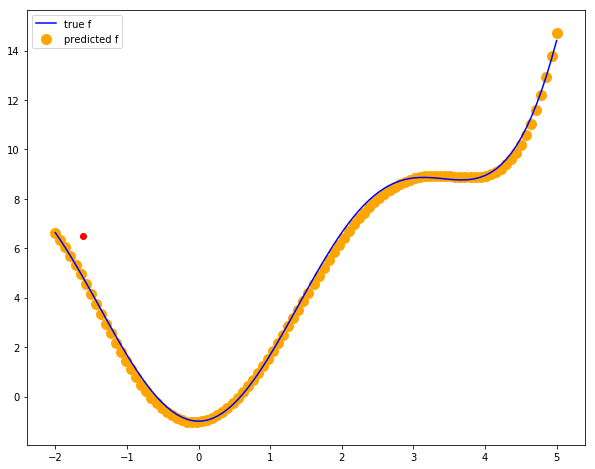

[[-1.02737245]
 [ 0.36796843]
 [ 2.78553933]
 [-0.26573611]
 [-0.22844191]
 [ 0.03848824]]


In [20]:
from IPython.display import clear_output

f_true = lambda x: 2 * x * np.sin(x) + x ** 2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2, 5, 100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100, 1)) ** j for j in range(6)))
y_grid = f_true(x_grid)
coeffs = np.zeros(6) # коэффициенты многочлена которые постоянно обучаются
XTdotX = np.zeros(shape=(6,6)) #X^T * X
XTdoty = np.zeros(shape=(6,1)) #X^T * y

def x_t(x): # функция которая дает x_(t)
    return np.array([[x ** i for i in range(0, 6)]]).transpose()

for tt in range(200):
    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # your code goes here
    x_column = x_t(x_new)
    to_add_1 = np.zeros(shape=(6,6))
    to_add_2 = np.zeros(shape=(6,1))
    for i in range(6):
        for j in range(6):
            to_add_1[i][j] = x_column[i][0] * x_column[j][0]
    for i in range(6):
        to_add_2[i][0] = x_column[i][0] * y_new
    XTdotX = np.add(XTdotX.copy(), to_add_1)
    XTdoty = np.add(XTdoty.copy(), to_add_2)
    
    if (tt + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.plot(x_grid, y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # your code goes here
        try:
            coeffs = np.dot(scipy.linalg.inv(XTdotX.copy()), XTdoty.copy())
        except:
            print('X^T * X необратима, Великий Рандом подвел нас :(')
            break
        y_pred = [f_at_point(coeffs, x) for x in x_grid]
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()
print(coeffs)

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ - матрица с ортонормированными столбцами, а $R$ - верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ - столбцы матрицы $A$, $q_1,\ldots,q_t$ - столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ - это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.